* 손실함수 : 결과값을 가장 작게 만드는 함수 가중치 매개변수를 찾을떄 사용 

# 4.1 데이터 학습

## 4.1.1 데이터 주도학습
특징을 추출하고 벡터가 가지는 가중치를 부여

종단간 기계학습 : 처음부터 끝까지 입력에서 결과를 얻는다. 

## 4.1.2 훈련데이터와 시험데이터 
범용능력을 평가하기 위해서 train, test 데이터 분리 

# 4.2 손실함수 
loss function : 최적의 매겨변수 값을 탐색 

평균 제곱 오차, 교차 엔트로피 오차 사용


## 4.2.1 평균 제곱 오차 

mean squared error MSE : 각 원소의 출력(추정) 값과 정답 레이블의 차를 제곱한 후 그 총합 

one hot encoding: 한원소만 1로 하고 그외는 0으로 나타내는 표기범


In [4]:
import numpy as np 

def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [5]:
t = [0,0,1,0,0,0,0,0,0,0]
y = [0.1,0.2,0.7,0.2,0.1,0,0,0,0,0]

print(mean_squared_error(np.array(y), np.array(t)))

t = [0,0,1,0,0,0,0,0,0,0]
y = [0.1,0.2,0.7,0.2,0.1,0,0.8,0,0,0]
print(mean_squared_error(np.array(y), np.array(t)))

0.095
0.415


오답에 가까울 수록 결과가 크다.

## 4.2.2 교차 엔트로피 
cross entroypy CEE : 정답에 해당하는 인덱스만 1 log 를 곱해도 나머진 모두 0이므로 결과에 영향을 주지 않는다. 정답일떄의 출력이 전체 값을 정함

정답에 해당하는 출력이 커질수록 0에 다가가다가 출력이 1일떄 0이 됨, 반대로 정답일때의 추렭이 작아질수록 오차는 커짐

In [7]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

# np.log(0) 이면 -inf 가 되어 계산을 진행할수 없음 0이 되지 않도록 해줌 

In [13]:
t = [0,0,1,0,0,0,0,0,0,0]
y = [0.1,0.2,0.7,0.2,0.1,0,0,0.1,0.2,0]
print(cross_entropy_error(np.array(y), np.array(t)))

y = [0.1,0.2,0.5,0.2,0.1,0,0.8,0,0,0]
print(cross_entropy_error(np.array(y), np.array(t)))

0.356674801082
0.69314698056


오차가 작은 처번째 추정이 정답일 가능성이 높다고 판단

## 4.2.3 미니배치 학습

모두에 대한 손실 함수의 합을 구함 평균 손실 함수 

일부만 골라서 학습 미니배치 학습 


In [7]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax

(x_train, t_train), (x_test, t_test) = load_mnist(normalize =True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

ModuleNotFoundError: No module named 'dataset'

In [ ]:
# 훈련 데이터에서 무작위로 10장만 뺌 np.random.choice 이용
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]np.random.choice

In [ ]:
np.random.choice(60000, 10)

## 4.2.4 (배치용) 교차 엔트로피 오차 구현하기 

데이터 하나당 교차 엔트로피 오차를 구하는 경우 reshape 함수로 데이터 shape 을 바꿈
배치크기로 나눠 정규화를 하고 이미지 1장단 평균의 교차 엔트로피 오차를 계산


In [ ]:

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y))/batch_size

In [ ]:
# one-hot 이 아닌 숫자 레이블일 경우 
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[arange(batch_size), t]))/batch_size

* np.log(y[arange(batch_size), t])  설명<br>
0 부터 batch_size-1 까지 배열을 생성 <br>
각 데이터 정답 레이블에 해당하는 신경망의 출력을 추출 <br>
예) [y[0,2],y[1,7],y[3,9],y[4,4]]

## 4.2.5 왜 손실 함수를 설정하는가?

손실함수의 미분 : 가중치 매개변수의 값을 아주 조금 변화시켰을때, 손실함수가 어떻게 변하냐 <br>
음수면 가중치 매개변수를 양으로 양이면 음수로 변화 시킴 <br>
미분 값이 0 이면 멈춤 <br>

계단 함수의 경우 미분한 값이 대부분 0 시그모이드는 연속적으로 변함 <br>
기울기가 0이 되지 않아 올바르게 학습할 수 있다. 

# 4.3 수치 미분

경사법 기울기(경사) 값을 기준으로 나아가야 하는 방향 

## 4.3.1 미분


In [ ]:
def numerical_diff(f,x):
    h=10e-50
    return (f(x+h)-f(x))/h

문제점1) 반올림 오차 소숫점 8자리 이하는 생략되어 0이 되버림<br>
문제점2) 차분 x+h 와 x 사이의 기울기에 해당됨 x 의 진정한 접선이 아니다. 

x+h 와 x-h 를 사용하여 x 를 중심으로 전후 차분을 계산 : 중심차분(중앙차분)

In [2]:
def numerical_diff(f,x):
    h=1e-4 #0.001
    return (f(x+h)-f(x-h))/(2*h)

## 4.3.2 수치미분의 예

In [3]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

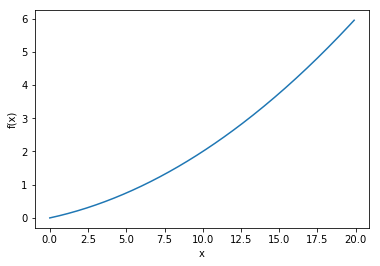

In [4]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

In [5]:
# 5일떄 변화량
numerical_diff(function_1, 5)

0.1999999999990898

In [6]:
# 10일떄 변화량
numerical_diff(function_1, 10)

0.2999999999986347

## 4.3.3 편미분


In [7]:
def function_2(x):
    return x[0]**2 + x[1]**2 #np.sum(x**2)

In [9]:
# x0=3 x1=4 x0 에 대한 편미분
def function_tmp1(x):
    return x*x + 4.0**2.0
numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [10]:
# x0=3 x1=4 x1 에 대한 편미분
def function_tmp1(x):
    return  3.0**2.0+x*x
numerical_diff(function_tmp1, 4.0)

7.999999999999119

# 4.4 기울기 (gradient)

모든 변수의 평미분을 벡터로 정리

In [ ]:
def